<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.662364,23.684898,73.679304,-0.000833,148.025734,148.026831,-0.001098
1,0.0,1.0,64.201568,27.048237,56.470120,-0.000633,157.719292,157.720111,-0.000819
2,0.0,2.0,56.740148,70.569067,46.103689,0.000190,183.413095,183.412994,0.000101
3,0.0,3.0,60.377861,84.043301,29.239464,-0.000088,183.660538,183.660706,-0.000168
4,0.0,4.0,76.207569,92.164624,36.765761,-0.000151,215.137803,215.137880,-0.000077
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.376011,51.843355,74.027845,-0.000230,217.246981,217.247045,-0.000064
59996,999.0,56.0,21.235188,28.238064,40.682012,0.000367,100.155630,100.155095,0.000536
59997,999.0,57.0,36.448265,32.984454,96.730319,-0.000640,176.162398,176.162661,-0.000263
59998,999.0,58.0,70.644502,91.242877,92.211844,-0.000322,264.098900,264.099192,-0.000291


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.662364  23.684898  73.679304  ...  148.025734  148.026831 -0.001098
      1.0    64.201568  27.048237  56.470120  ...  157.719292  157.720111 -0.000819
      2.0    56.740148  70.569067  46.103689  ...  183.413095  183.412994  0.000101
      3.0    60.377861  84.043301  29.239464  ...  183.660538  183.660706 -0.000168
      4.0    76.207569  92.164624  36.765761  ...  215.137803  215.137880 -0.000077
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.376011  51.843355  74.027845  ...  217.246981  217.247045 -0.000064
      56.0   21.235188  28.238064  40.682012  ...  100.155630  100.155095  0.000536
      57.0   36.448265  32.984454  96.730319  ...  176.162398  176.162661 -0.000263
      58.0   70.644502  91.242877  92.211844  ...  264.098900  264.099192 -0.000291
      59.0   81.052001  29.357635  46.164900  ...  166.573506  166.574366 -0.000859

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.662364  23.684898  73.679304  ...  148.025734  148.026831 -0.001098
      1.0    64.201568  27.048237  56.470120  ...  157.719292  157.720111 -0.000819
      2.0    56.740148  70.569067  46.103689  ...  183.413095  183.412994  0.000101
      3.0    60.377861  84.043301  29.239464  ...  183.660538  183.660706 -0.000168
      4.0    76.207569  92.164624  36.765761  ...  215.137803  215.137880 -0.000077
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.376011  51.843355  74.027845  ...  217.246981  217.247045 -0.000064
      56.0   21.235188  28.238064  40.682012  ...  100.155630  100.155095  0.000536
      57.0   36.448265  32.984454  96.730319  ...  176.162398  176.162661 -0.000263
      58.0   70.644502  91.242877  92.211844  ...  264.098900  264.099192 -0.000291
      59.0   81.052001  29.357635  46.164900  ...  166.573506  166.574366 -0.000859

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,40.662364,23.684898,73.679304,-0.000833,148.025734,148.026831,-0.001098
1,0.0,1.0,64.201568,27.048237,56.470120,-0.000633,157.719292,157.720111,-0.000819
2,0.0,2.0,56.740148,70.569067,46.103689,0.000190,183.413095,183.412994,0.000101
3,0.0,3.0,60.377861,84.043301,29.239464,-0.000088,183.660538,183.660706,-0.000168
4,0.0,4.0,76.207569,92.164624,36.765761,-0.000151,215.137803,215.137880,-0.000077
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.376011,51.843355,74.027845,-0.000230,217.246981,217.247045,-0.000064
59996,999.0,56.0,21.235188,28.238064,40.682012,0.000367,100.155630,100.155095,0.000536
59997,999.0,57.0,36.448265,32.984454,96.730319,-0.000640,176.162398,176.162661,-0.000263
59998,999.0,58.0,70.644502,91.242877,92.211844,-0.000322,264.098900,264.099192,-0.000291


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    40.662364  23.684898  73.679304  ...  148.025734  148.026831 -0.001098
      1.0    64.201568  27.048237  56.470120  ...  157.719292  157.720111 -0.000819
      2.0    56.740148  70.569067  46.103689  ...  183.413095  183.412994  0.000101
      3.0    60.377861  84.043301  29.239464  ...  183.660538  183.660706 -0.000168
      4.0    76.207569  92.164624  36.765761  ...  215.137803  215.137880 -0.000077
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   81.376011  51.843355  74.027845  ...  217.246981  217.247045 -0.000064
      56.0   21.235188  28.238064  40.682012  ...  100.155630  100.155095  0.000536
      57.0   36.448265  32.984454  96.730319  ...  176.162398  176.162661 -0.000263
      58.0   70.644502  91.242877  92.211844  ...  264.098900  264.099192 -0.000291
      59.0   81.052001  29.357635  46.164900  ...  166.573506  166.574366 -0.000859

[60000 rows x 7 columns]

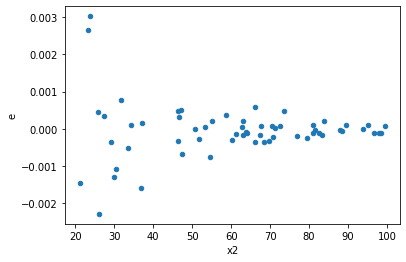

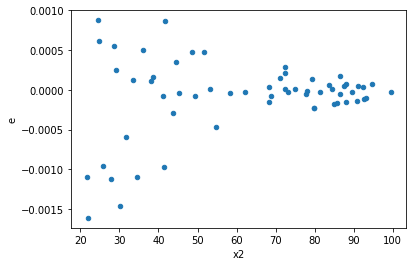

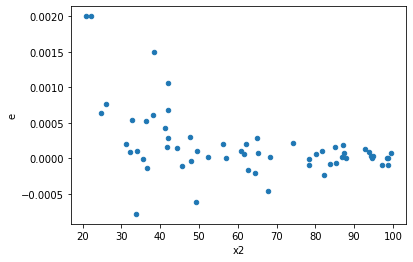

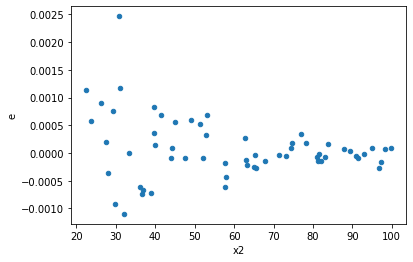

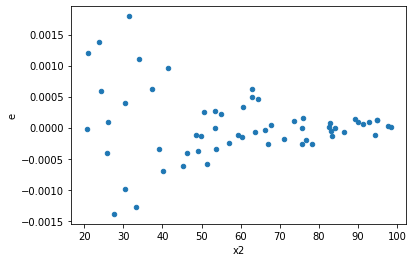

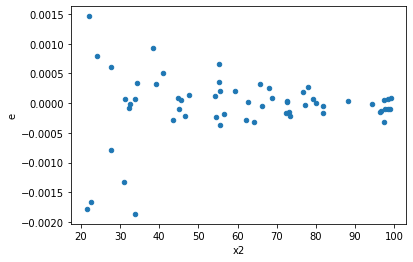

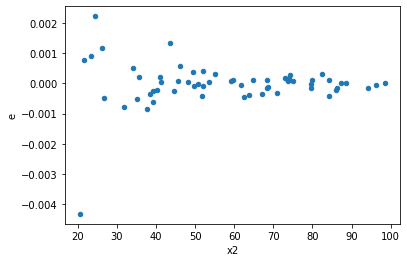

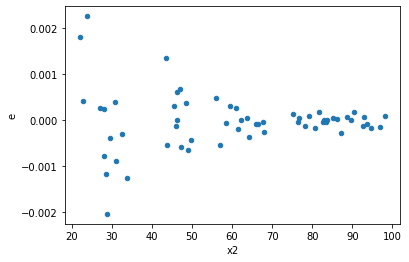

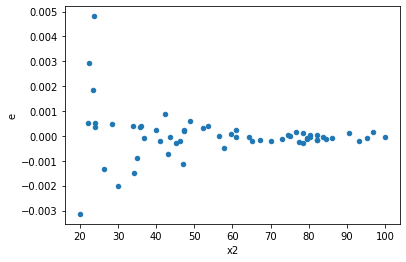

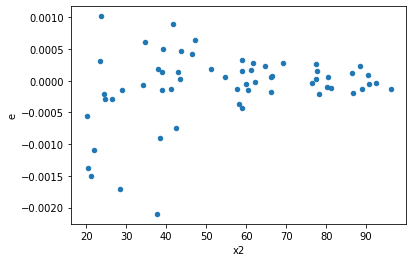

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,16.0,38.0,3.7206146846216663e-07,4.3249025449268715e-05,2.4804097897477775e-08,1.1688925797099652e-06,48.94383730168815,7.632872112139921e-11,0.9999999999618356,Reject005=0 : Heteroscedasticity
3.0,31.0,23.0,2.2918593657988534e-05,2.4111386625111022e-05,7.639531219329511e-07,1.0959721193232284e-06,1.4179733875028442,0.3608533047042095,0.8195733476478952,Reject005=1 : Homoscedasticity
7.0,24.0,30.0,4.231093273854861e-06,3.625918818893205e-05,1.8396057712412438e-07,1.250316834101105e-06,6.855757761330949,7.965716584124038e-06,0.9999960171417079,Reject005=0 : Heteroscedasticity
9.0,22.0,32.0,3.5892325575792665e-06,2.163040840526697e-05,1.7091583607520317e-07,6.977551098473216e-07,4.143199288443606,0.0009376588086977833,0.9995311705956511,Reject005=0 : Heteroscedasticity
10.0,22.0,32.0,9.888409081815239e-06,1.878454648557609e-05,4.708766229435828e-07,6.059531124379383e-07,1.3060114728245888,0.5192357069881712,0.7403821465059144,Reject005=1 : Homoscedasticity
12.0,24.0,30.0,1.2468181203596597e-06,8.016181823608864e-06,5.4209483493898245e-08,2.7642006288306424e-07,5.143449035723992,0.00010787793021860281,0.9999460610348907,Reject005=0 : Heteroscedasticity
13.0,26.0,28.0,2.8368825093505533e-06,1.0785489618144352e-05,1.1347530037402213e-07,3.994625784497908e-07,3.5303180408607635,0.0018092892329149013,0.9990953553835425,Reject005=0 : Heteroscedasticity
15.0,30.0,24.0,7.14669059327928e-06,9.317194752778765e-06,2.464376066648028e-07,4.050954240338593e-07,1.62963448451592,0.20450445854803,0.897747770725985,Reject005=1 : Homoscedasticity
16.0,29.0,25.0,7.4738334506121815e-06,2.0403016180744222e-05,2.6692262323614934e-07,8.501256741976759e-07,3.1667147690753925,0.0033690896084468402,0.9983154551957766,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,19.0,35.0,2.9341224176278478e-05,1.1764864147297324e-06,1.6300680097932489e-06,3.460254160969801e-08,0.021766782799293265,5.927654749783784e-19,Reject005=0 : Heteroscedasticity
1.0,16.0,38.0,3.7206146846216663e-07,4.3249025449268715e-05,2.4804097897477775e-08,1.1688925797099652e-06,48.94383730168815,7.632872112139921e-11,Reject005=0 : Heteroscedasticity
2.0,31.0,23.0,1.3404291307574926e-05,8.580408242600977e-06,4.468097102524975e-07,3.900185564818626e-07,0.8627757932699431,0.7226847570488748,Reject005=1 : Homoscedasticity
3.0,31.0,23.0,2.2918593657988534e-05,2.4111386625111022e-05,7.639531219329511e-07,1.0959721193232284e-06,1.4179733875028442,0.3608533047042095,Reject005=1 : Homoscedasticity
4.0,27.0,27.0,2.0090848933168784e-05,2.0429332248552604e-06,7.727249589680302e-07,7.85743548021254e-08,0.10168476362800681,7.141943328817389e-08,Reject005=0 : Heteroscedasticity
5.0,29.0,25.0,1.3480468132095591e-05,1.6342364132705968e-06,4.814452904319853e-07,6.809318388627486e-08,0.14062673646179943,4.151035973473129e-06,Reject005=0 : Heteroscedasticity
6.0,21.0,33.0,9.205386207195562e-06,7.875801650290991e-06,4.602693103597781e-07,2.461188015715935e-07,0.5444501365450891,0.11452833110560073,Reject005=1 : Homoscedasticity
7.0,24.0,30.0,4.231093273854861e-06,3.625918818893205e-05,1.8396057712412438e-07,1.250316834101105e-06,6.855757761330949,7.965716584124038e-06,Reject005=0 : Heteroscedasticity
8.0,25.0,29.0,1.593884413447181e-05,4.4523280867934794e-06,6.641185056029921e-07,1.590117173854814e-07,0.24080879614251938,0.0003387948224797561,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    683
Reject005=1 : Homoscedasticity      317
Name: Result_test, dtype: int64